# Problem statement



1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?


## Imports

In [30]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Geographical plotting
import geopandas as gpd

# Geodatasets offers geo spatial data
from geodatasets import get_path

# Acquiring data

In [3]:
# Loading dataset

df = pd.read_csv("./dataset/AB_NYC_2019.csv")

# Data Wrangling

## Basic meta

In [4]:
# Number of rows and columns

df.shape

(48895, 16)

This dataset have 48895 data points (rows) with 16 features (columns)

In [5]:
# Feature names / column titles

df.columns.values.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

1. "id" - Unique id
2. "name" - Name of the property / place
3. "host_id" - Hoster's id
4. "host_name" - Host's name
5. "neighbourhood_group" - nearby Neighbourhood grouped together under bigger neighborhood
6. "neighbourhood" - Property neighbourhood
7. "latitude" - Latitude of the property
8. "longitude" -Longitude of the property
9. "room_type" - Room type
10. "price" - price of the property
11. "minimum_nights" - Minimum nights available to occupy
12. "number_of_reviews" - Total number of reviews on that property
13. "last_review" - last review on that property
14. "reviews_per_month" - average reviews per month on that property
15. "calculated_host_listings_count" -  number of properties hosted by the same host
16. "availability_365" - property availability throughout the year

In [6]:
# Data types of the features

df.dtypes.sort_values()

id                                  int64
host_id                             int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
latitude                          float64
longitude                         float64
reviews_per_month                 float64
name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
room_type                          object
last_review                        object
dtype: object

## Missing data

In [7]:

# Checking for missing values
missing = df.isnull().sum()


# Filtering features with missing values
missing[missing>0].sort_values(ascending = False)

reviews_per_month    10052
last_review          10052
host_name               21
name                    16
dtype: int64

**"name" & "host_name" Columns**

`name` and `host_name` are essential fields required by Airbnb for listing properties on their website and app. Missing values in these fields likely resulted from errors during data extraction or mining. However, we can address these gaps by leveraging dependent features such as `id`, `host_id`, and `calculated_host_listing_count` to fill in the missing data."

In [8]:
# Missing value correlation between features `name` and `host_name`

df[df["host_name"].isnull()]["name"].isnull().sum()


np.int64(0)

There is no correlation between missing values in `name` and `host_name`

### `host_name`

In [9]:
# Correlation between `host_name` and `host_id`, `calculated_host_listings_count

df[df["host_name"].isnull()][["host_id","calculated_host_listings_count"]]

,host_id,calculated_host_listings_count
360,526653,1
2700,7779204,1
5745,919218,1
6075,23077718,1
6582,24576978,1
8163,32722063,2
8257,33134899,1
8852,32722063,2
9138,5162530,1
9817,39608626,1


In [10]:
# Creating mapper dic to fill missing values with dumpy names (ex: un-named 1, un-named 2,...) with host_id
maper = {}
count = 1
for host_id in df[df["host_name"].isnull()]["host_id"].unique():
    
    maper[host_id] = f"un-host_named {count}"
    count +=1

In [11]:
maper

{np.int64(526653): 'un-host_named 1',
 np.int64(7779204): 'un-host_named 2',
 np.int64(919218): 'un-host_named 3',
 np.int64(23077718): 'un-host_named 4',
 np.int64(24576978): 'un-host_named 5',
 np.int64(32722063): 'un-host_named 6',
 np.int64(33134899): 'un-host_named 7',
 np.int64(5162530): 'un-host_named 8',
 np.int64(39608626): 'un-host_named 9',
 np.int64(7822683): 'un-host_named 10',
 np.int64(26138712): 'un-host_named 11',
 np.int64(5300585): 'un-host_named 12',
 np.int64(100971588): 'un-host_named 13',
 np.int64(415290): 'un-host_named 14',
 np.int64(159156636): 'un-host_named 15',
 np.int64(177146433): 'un-host_named 16',
 np.int64(119609345): 'un-host_named 17',
 np.int64(228750026): 'un-host_named 18'}

In [12]:
# Filling missing values of `host_name`

df["host_name"] = df[["host_id","host_name"]].apply(lambda row: maper[row["host_id"]] if pd.isna(row["host_name"]) else row["host_name"], axis =1) 

In [13]:
df["host_name"].isnull().sum()

np.int64(0)

### `name`

In [14]:
if len(df["id"].unique()) == len(df["id"]):
    print("every id is unique")

every id is unique


In [15]:
# Checking uniqueness of the names

df["name"].value_counts()[df["name"].value_counts() >6]


name
Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Beautiful Brooklyn Brownstone                  8
Private room in Brooklyn                       8
Cozy Brooklyn Apartment                        8
Private room in Williamsburg                   8
Harlem Gem                                     7
Name: count, dtype: int64

`name` is not unique. so there is repeated listing of the same property is present in the dataset (not duplicates, but with different features/ parameters)

In [16]:
# Filtering row with missing names and calculated_host_listings_count > 1

df[(df["name"].isnull()) & (df["calculated_host_listings_count"]>1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0


In [17]:
# Checking whether host_id 50448556  listed same property under different name

df[(df["host_id"] == 50448556) | (df["host_id"]==69715276)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
12827,9788141,Bedroom in UWS,50448556,Miguel,Manhattan,Harlem,40.80518,-73.95099,Private room,100,1,1,2015-12-03,0.02,5,0
12830,9790098,Bedroom in UWS 118th st,50448556,Miguel,Manhattan,Harlem,40.80345,-73.95067,Private room,200,1,0,NaN,NaN,5,0
13071,9896731,BEDROOM IN UWS,50448556,Miguel,Manhattan,Harlem,40.80489,-73.95171,Private room,100,2,1,2015-12-09,0.02,5,0
13091,9902915,BEDROOM IN UWS,50448556,Miguel,Manhattan,Harlem,40.80519,-73.95091,Private room,100,6,0,NaN,NaN,5,0
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
15820,12797920,Large Bedroom near Subway,69715276,Yan,Manhattan,Upper West Side,40.79806,-73.96167,Private room,100,1,1,2016-07-31,0.03,2,0


The row with a missing value for `name` has a `host_name` who manages multiple properties but does not host the same property repeatedly. we can fill missing `name` values with `room_type` which would makes sense.

In [18]:
# Filling missing values 

df["name"] = df["name"].fillna(df["room_type"])

### "last_review" & "reviews_per_month" Columns 

In [19]:
df[ (df["last_review"].isnull()) & (df["reviews_per_month"].isnull())].shape

(10052, 16)

it looks like missing values of `last_review` and `reviews_per_month` are from same row, showing these listings doesnt have single review.

In [20]:
# Filling missing values of `last_review`

df.fillna({"last_review":"No review", "reviews_per_month":0}, inplace=True)

In [21]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Removing Duplicate values

In [22]:
# Finding duplicate data

duplicates = df.duplicated().sum()
print(duplicates)

0


In [22]:
print("NO duplicates found!")

NO duplicates found!


## EDA

In [51]:
# Getting newyork city's spatial data from geodatasets (its is availaber under the name nybb
nybb = gpd.read_file(get_path("nybb"))
nybb = nybb.to_crs(32619) # converts to coordinate systems which uses meter as basic unit
nybb.set_index("BoroName", inplace =True)
nybb["area"] = nybb.area

In [54]:
nybb["boundary"] = nybb.boundary

<Axes: >

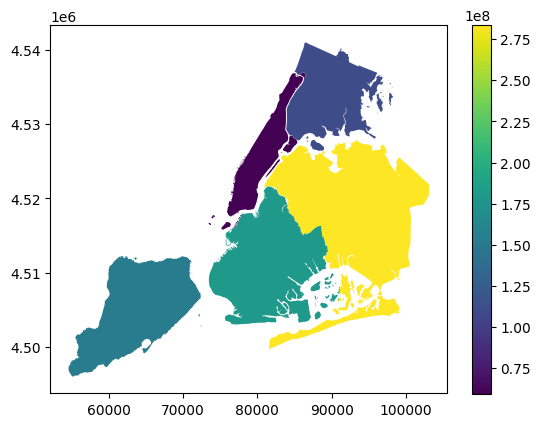

In [56]:
nybb.plot("area", legend = True)

### Question 1. what can we learn from different hosts and areas?
Features involving - host_id, host_name, neighbourhood, neighbourhood_groups, lattitude and longitude

In [24]:
temp = df[["neighbourhood_group", "host_id"]].groupby(by ="neighbourhood_group").count().reset_index()
temp.columns = ["neighbourhood_group","no_of_hosts"]

temp1 = df[["neighbourhood_group","id"]].groupby(by="neighbourhood_group").count().reset_index()
temp1.columns = ["neighbourhood_group","data_count"]

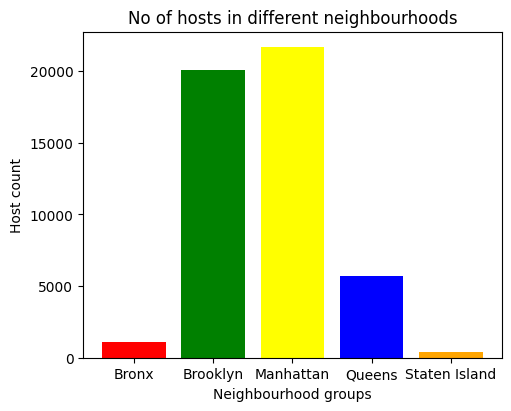

In [84]:
fig, axs = plt.subplots(figsize = (5, 4), layout = "constrained")
# 
axs.bar("neighbourhood_group", "no_of_hosts", data =temp,color=["red","green","yellow","blue","orange"])
axs.set_title("No of hosts in different neighbourhoods")
axs.set_xlabel("Neighbourhood groups")
axs.set_ylabel("Host count")

plt.show()

In [85]:
df["host_id"].unique()

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814], shape=(37457,))

## Data Transformation

In [58]:
# Filtering categorical variables

categories = df.select_dtypes(include=["object", "category"]).columns
print(categories)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')


In [59]:
for category in categories:
    unique = df[category].unique()
    length  = len(unique)
    print(f"Unique categories in {category} has {len(unique)} unique values")
    if length< 10:
        print(unique)
    

Unique categories in name has 47907 unique values
Unique categories in host_name has 11470 unique values
Unique categories in neighbourhood_group has 5 unique values
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique categories in neighbourhood has 221 unique values
Unique categories in room_type has 3 unique values
['Private room' 'Entire home/apt' 'Shared room']
Unique categories in last_review has 1765 unique values


<p>We have very few features. so i am going to use one hot encoding for `neighbourhood_group` and `room_type`</p>

### Encoding

In [60]:
# Importing Onehot encoding

from src.preprocessing import encoding
onehot_encoder = encoding.OneHotEncoding()

ModuleNotFoundError: No module named 'src'

In [61]:
# neighbourhood_group feature encoding

encoded_df = onehot_encoder.encode(df=df, column=categories[0])
df.drop(labels=[categories[0]], axis=1, inplace =True)
df_encoded= pd.concat([df, encoded_df], axis =1)

NameError: name 'onehot_encoder' is not defined

In [101]:
df_encoded.head(3)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,2787,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0
1,2595,2845,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0
2,3647,4632,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0


In [102]:
# room_type onehot encoding

print(categories[2])
encoded_df = onehot_encoder.encode(df=df, column=categories[2])
df_encoded.drop(labels=[categories[2]],axis=1, inplace= True)
df_encoded = pd.concat([df_encoded,encoded_df],axis=1)

room_type


In [103]:
# neighbourhood hash encoding

from src.preprocessing.encoding import LabelEncoding

label_encoding = LabelEncoding()

df_encoded = label_encoding.encode(df=df_encoded, column="neighbourhood")

In [104]:
df_encoded.head(3)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,108,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,2845,127,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3647,4632,94,40.80902,-73.94190,150,3,0,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Normalisation

In [121]:
df_encoded.drop("last_review", axis=1, inplace=True)

### Train test split

In [123]:
features = df_encoded.drop("price", axis=1)
target = df_encoded["price"]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

In [126]:
x_train.shape

(32759, 18)

In [127]:
x_test.shape

(16136, 18)

In [128]:
y_train.shape

(32759,)

In [129]:
y_test.shape

(16136,)

## Machine Learning

### Linear Regression


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [135]:
linear_regressor = LinearRegression()

In [136]:
linear_regressor_fitted = linear_regressor.fit(x_train, y_train)

In [137]:
y_predict = linear_regressor_fitted.predict(x_test)

#### Evaluation

In [142]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, y_predict)
print(f"Mean absolute Error: {mae}")

Mean absolute Error: 75.5198279994184


In [143]:
# Mean Squared Error

mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 67162.19708314474


In [144]:
# Root mean squared error

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squarred Error: 259.15670372024863


In [146]:
# R- Squared 

r2 = r2_score(y_test, y_predict)
print(f"R-Squared score: {r2}")

R-Squared score: 0.0783217624336533


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Random Forest

In [ ]:
rfs=RandomForestClassifier()

In [ ]:
rff=rfs.fit(x_train,y_train)

In [ ]:
y_predict=rff.predict(x_test)

In [ ]:
y_predic=pd.DataFrame(y_predict)

In [ ]:
reverse_map={0:dict(zip(list(range(1,len(cate)+1)),cate))}
y_predic.replace(reverse_map,inplace=True)

In [ ]:
# Saving the results in Csv
data={'id':test.id,'country':y_predic[0]}
pd.DataFrame(data).set_index('id').to_csv(r'submission files/submission_RF01.csv')

In [ ]:
best_score=pd.read_csv(r'submission files/submission_RF01.csv')

### Support Vector Machine

In [ ]:
sv=svm()

In [ ]:
svr=rfs.fit(x_train_f,y_train)

In [ ]:
y_predict=svr.predict(x_test_f)

In [ ]:
y_predict

In [ ]:
# Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_RF02.csv')

In [ ]:
best_score=pd.read_csv(r'submission files/submission_RF01.csv')

In [ ]:
a=best_score['SalePrice']-y_predict

In [ ]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [ ]:
best_score['new']=y_predict

In [ ]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

### K-Nearest Neighbours

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
knn=KNN.fit(x_train,y_train)

In [ ]:
y_predict=knn.predict(x_test)

In [ ]:
y_predic=pd.DataFrame(y_predict)

In [ ]:
reverse_map={0:dict(zip(list(range(1,len(cate)+1)),cate))}
y_predic.replace(reverse_map,inplace=True)

In [ ]:
# Saving the results in Csv
data={'id':test.id,'country':y_predic[0]}
pd.DataFrame(data).set_index('id').to_csv(r'submission files/submission_KNN01.csv')

In [ ]:
y_predict

In [ ]:
# Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_RF02.csv')

In [ ]:
best_score=pd.read_csv(r'submission files/submission_RF01.csv')

In [ ]:
a=best_score['SalePrice']-y_predict

In [ ]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [ ]:
best_score['new']=y_predict

In [ ]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)

### XGBoostClassifier

In [ ]:
xg=XGBClassifier()

In [ ]:
xgf=xg.fit(x_train,y_train)

In [ ]:
y_predict=xgf.predict(x_test)

In [ ]:
y_predic=pd.DataFrame(y_predict)

In [ ]:
reverse_map={0:dict(zip(list(range(1,len(cate)+1)),cate))}
y_predic.replace(reverse_map,inplace=True)

In [ ]:
# Saving the results in Csv
data={'id':test.id,'country':y_predic[0]}
pd.DataFrame(data).set_index('id').to_csv(r'submission files/submission_XG01.csv')